# Fundamentals of Data Mining - Homework 5
## Mohammad Bahrami - 9724133
### Question 2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Part a

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.isna().sum()
# No Nan Values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Part b

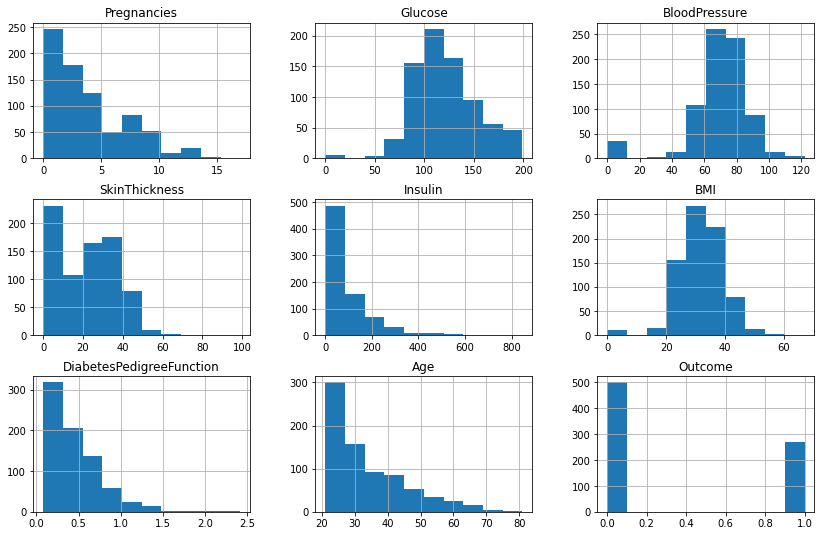

In [4]:
axs = dataset.hist(figsize=(14, 9))

#### Part c

In [5]:
dataset.loc[:, 'BMI'] = pd.qcut(dataset['BMI'], 4)
dataset.loc[:, 'Age'] = pd.qcut(dataset['Age'], 4)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,"(32.0, 36.6]",0.627,"(41.0, 81.0]",1
1,1,85,66,29,0,"(-0.001, 27.3]",0.351,"(29.0, 41.0]",0
2,8,183,64,0,0,"(-0.001, 27.3]",0.672,"(29.0, 41.0]",1
3,1,89,66,23,94,"(27.3, 32.0]",0.167,"(20.999, 24.0]",0
4,0,137,40,35,168,"(36.6, 67.1]",2.288,"(29.0, 41.0]",1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,"(32.0, 36.6]",0.171,"(41.0, 81.0]",0
764,2,122,70,27,0,"(36.6, 67.1]",0.340,"(24.0, 29.0]",0
765,5,121,72,23,112,"(-0.001, 27.3]",0.245,"(29.0, 41.0]",0
766,1,126,60,0,0,"(27.3, 32.0]",0.349,"(41.0, 81.0]",1


#### Part d

In [7]:
items_df = pd.concat([
    pd.get_dummies(dataset[['BMI', 'Age']]),
    pd.get_dummies(dataset['Outcome'], prefix='outcome')
], axis=1)
items_df

,"BMI_(-0.001, 27.3]","BMI_(27.3, 32.0]","BMI_(32.0, 36.6]","BMI_(36.6, 67.1]","Age_(20.999, 24.0]","Age_(24.0, 29.0]","Age_(29.0, 41.0]","Age_(41.0, 81.0]",outcome_0,outcome_1
0,0,0,1,0,0,0,0,1,0,1
1,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,1
3,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
763,0,0,1,0,0,0,0,1,1,0
764,0,0,0,1,0,1,0,0,1,0
765,1,0,0,0,0,0,1,0,1,0
766,0,1,0,0,0,0,0,1,0,1


#### Part e

In [8]:
from mlxtend.frequent_patterns import apriori
apriori_frequent_items_df = apriori(items_df.astype(bool), min_support=0.01, use_colnames=True).sort_values(by=['support'], ascending=False)
apriori_frequent_items_df

,support,itemsets
8,0.651042,(outcome_0)
9,0.348958,(outcome_1)
4,0.285156,"(Age_(20.999, 24.0])"
6,0.260417,"(Age_(29.0, 41.0])"
0,0.252604,"(BMI_(-0.001, 27.3])"
...,...,...
63,0.019531,"(Age_(20.999, 24.0], outcome_1, BMI_(36.6, 67.1])"
49,0.019531,"(BMI_(27.3, 32.0], outcome_1, Age_(24.0, 29.0])"
57,0.018229,"(outcome_1, Age_(24.0, 29.0], BMI_(32.0, 36.6])"
55,0.013021,"(Age_(20.999, 24.0], outcome_1, BMI_(32.0, 36.6])"


#### Part f

In [9]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth_frequent_items_df = fpgrowth(items_df.astype(bool), min_support=0.01, use_colnames=True).sort_values(by=['support'], ascending=False)
fpgrowth_frequent_items_df

,support,itemsets
3,0.651042,(outcome_0)
0,0.348958,(outcome_1)
6,0.285156,"(Age_(20.999, 24.0])"
4,0.260417,"(Age_(29.0, 41.0])"
1,0.252604,"(BMI_(32.0, 36.6])"
...,...,...
56,0.019531,"(Age_(20.999, 24.0], outcome_1, BMI_(36.6, 67.1])"
64,0.019531,"(BMI_(27.3, 32.0], outcome_1, Age_(24.0, 29.0])"
67,0.018229,"(outcome_1, Age_(24.0, 29.0], BMI_(32.0, 36.6])"
28,0.013021,"(outcome_1, Age_(41.0, 81.0], BMI_(-0.001, 27.3])"


#### Part g

In [22]:
from mlxtend.frequent_patterns import association_rules
apriori_assoc_rules = association_rules(apriori_frequent_items_df, metric='confidence', min_threshold=0.5).sort_values(by=['confidence'], ascending=False).reset_index(drop=True)
fpgrowth_assoc_rules = association_rules(fpgrowth_frequent_items_df, metric='confidence', min_threshold=0.5).sort_values(by=['confidence'], ascending=False).reset_index(drop=True)

In [26]:
(~(apriori_assoc_rules[['antecedents', 'consequents']] == fpgrowth_assoc_rules[['antecedents', 'consequents']])).sum()

antecedents    0
consequents    0
dtype: int64

we can see that there is no difference in the rules created by both methods in terms of antecedents as consequents.